<a href="https://colab.research.google.com/github/JayRolla/market-sales-/blob/main/Big%20market%20sales%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib

In [2]:
pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 18.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=5a2b12ffc8ec285ac27b93cc3cec94218e7cb8095af0dec3385417ed8f067c61
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pan

In [80]:
import pandas as pd
import numpy as np
#import pandas profiling for quick summary of data
from ydata_profiling import ProfileReport
#libraries for visualizing the data
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
# Model selection and evaluation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
#Statistical analysis
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# Utility
import joblib
from joblib import dump, load

# Set up visualization settings for Jupyter Notebook (if using)
%matplotlib inline
sns.set_style("whitegrid")

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/JayRolla/market-sales-/main/train_market.csv')
test   = pd.read_csv('https://raw.githubusercontent.com/JayRolla/market-sales-/main/test_market.csv')

In [5]:
profile = ProfileReport(train, title='Pandas Profiling Report on training data', explorative=True)
profile.to_widgets()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:524: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Low Fat'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
profile = ProfileReport(test, title='Pandas Profiling Report on test data', explorative=True)
profile.to_widgets()

Item weight in both datasets contains missing values and there are a couple of NaN values in the outlet size


In [43]:
df1 = train.copy()
df2 = test.copy()

In [44]:
def impute_item_weight(df):
    """Impute missing Item_Weight based on the mean weight of the corresponding Item_Type."""
    return df.groupby('Item_Type')['Item_Weight'].transform(lambda x: x.fillna(x.mean()))

def impute_outlet_size(df):
    """Impute missing Outlet_Size based on the mode size of the corresponding Outlet_Type."""
    return df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.nan))

'''
Now, i apply these functions to THE training and test datasets (df1 and df2),
Since I AM applying the same transformations to both datasets,
this approach ensures consistency in how missing values are handled across your datasets. '''


df1['Item_Weight'] = impute_item_weight(df1)
df1['Outlet_Size'] = impute_outlet_size(df1)

df2['Item_Weight'] = impute_item_weight(df2)
df2['Outlet_Size'] = impute_outlet_size(df2)

In [45]:
# Check if there are any NaN values left in the 'Item_Weight' and 'Outlet_Size' columns of df1
print("Training Set (df1) Missing Values Check:")
print("Item_Weight missing values:", df1['Item_Weight'].isnull().sum())
print("Outlet_Size missing values:", df1['Outlet_Size'].isnull().sum())

# Check if there are any NaN values left in the 'Item_Weight' and 'Outlet_Size' columns of df2
print("\nTest Set (df2) Missing Values Check:")
print("Item_Weight missing values:", df2['Item_Weight'].isnull().sum())
print("Outlet_Size missing values:", df2['Outlet_Size'].isnull().sum())


Training Set (df1) Missing Values Check:
Item_Weight missing values: 0
Outlet_Size missing values: 0

Test Set (df2) Missing Values Check:
Item_Weight missing values: 0
Outlet_Size missing values: 0


In [46]:
def check_unique_values(df):
    """
    I wrote this function to iterate through a list of specified columns in a DataFrame (df)
    and print the unique values present in each column. This helps me to quickly identify
    discrepancies, such as inconsistent categorization or misspellings, before proceeding
    with data cleaning. It's particularly useful when I'm familiarizing myself with a new dataset
    or ensuring that my cleaning efforts have been successful.

    Parameters:
    - df (pd.DataFrame): The DataFrame on which I want to check the unique values.

    The function doesn't return anything; its primary purpose is to print information.
    """

    # I defined a list of columns that I'm interested in checking for unique values.
    columns_to_check = ['Item_Fat_Content', 'Item_Visibility', 'Item_Type',
                        'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
                        'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']

    for column in columns_to_check:
        # Here, I check if the current column exists in the DataFrame.
        if column in df.columns:
            print(f"Unique values in '{column}':")
            # I sort the unique values for easier reading and potential issue spotting.
            print(sorted(df[column].unique()), "\n")
        else:
            # If a column isn't found, I'll make a note of it.
            print(f"Column '{column}' does not exist in this DataFrame.\n")

# Now, I'll apply this function to both my training and test datasets.
print("Training Dataset (df1):")
check_unique_values(df1)

print("\nTest Dataset (df2):")
check_unique_values(df2)


Training Dataset (df1):
Unique values in 'Item_Fat_Content':
['LF', 'Low Fat', 'Regular', 'low fat', 'reg'] 

Unique values in 'Item_Visibility':
[0.0, 0.003574698, 0.003589104, 0.003597678, 0.003599378, 0.003606726, 0.003612411, 0.005209791, 0.005230786, 0.005234153, 0.005235143, 0.005243282, 0.005264755, 0.005448005, 0.00547348, 0.005474515, 0.005485618, 0.005496816, 0.005505481, 0.005525913, 0.00552947, 0.005530516, 0.005539114, 0.005547386, 0.005557062, 0.005561538, 0.005561798, 0.005583951, 0.005611367, 0.005620213, 0.005638944, 0.005661669, 0.005677876, 0.005935001, 0.005949644, 0.005958918, 0.005962753, 0.005963881, 0.00597362, 0.005977465, 0.005978595, 0.00599072, 0.005997615, 0.006012413, 0.006061565, 0.006075007, 0.006087409, 0.006289291, 0.006295472, 0.006335942, 0.006351876, 0.00636189, 0.006665667, 0.006692529, 0.006708517, 0.006725388, 0.006727008, 0.006754117, 0.006759519, 0.00676387, 0.006765149, 0.006770252, 0.006775667, 0.007006883, 0.007038478, 0.00704098, 0.00704300

In [47]:
def standardize_fat_content(df):
    """
    I created this function to standardize the 'Item_Fat_Content' column values.
    It maps various representations of fat content ('LF', 'low fat', and 'reg')
    to a consistent format ('Low Fat' and 'Regular'). This helps ensure uniformity
    and reduces potential issues caused by categorical value discrepancies.

    Parameters:
    - df (pd.DataFrame): The DataFrame for which the 'Item_Fat_Content' values need to be standardized.

    Returns:
    - df (pd.DataFrame): The DataFrame with standardized 'Item_Fat_Content' values.
    """

    # I define a mapping from the observed categories to the standardized ones.
    fat_content_mapping = {
        'LF': 'Low Fat',
        'low fat': 'Low Fat',
        'reg': 'Regular'
    }

    # I use the 'replace' method to apply this mapping across the 'Item_Fat_Content' column.
    df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_mapping)

    return df

# Now, I'll apply this function to both my training and test datasets.
df1 = standardize_fat_content(df1)
df2 = standardize_fat_content(df2)

# To verify the standardization worked as expected, I print the unique values again.
print("After standardization, unique values in 'Item_Fat_Content' for Training Dataset (df1):")
print(df1['Item_Fat_Content'].unique())

print("\nAfter standardization, unique values in 'Item_Fat_Content' for Test Dataset (df2):")
print(df2['Item_Fat_Content'].unique())


After standardization, unique values in 'Item_Fat_Content' for Training Dataset (df1):
['Low Fat' 'Regular']

After standardization, unique values in 'Item_Fat_Content' for Test Dataset (df2):
['Low Fat' 'Regular']


In [48]:
# Understanding basic statistical details of numerical features
print(df1[['Item_MRP', 'Item_Outlet_Sales']].describe())

#  To get a sense of the central tendency and dispersion of item prices and sales.


          Item_MRP  Item_Outlet_Sales
count  8523.000000        8523.000000
mean    140.992782        2181.288914
std      62.275067        1706.499616
min      31.290000          33.290000
25%      93.826500         834.247400
50%     143.012800        1794.331000
75%     185.643700        3101.296400
max     266.888400       13086.964800


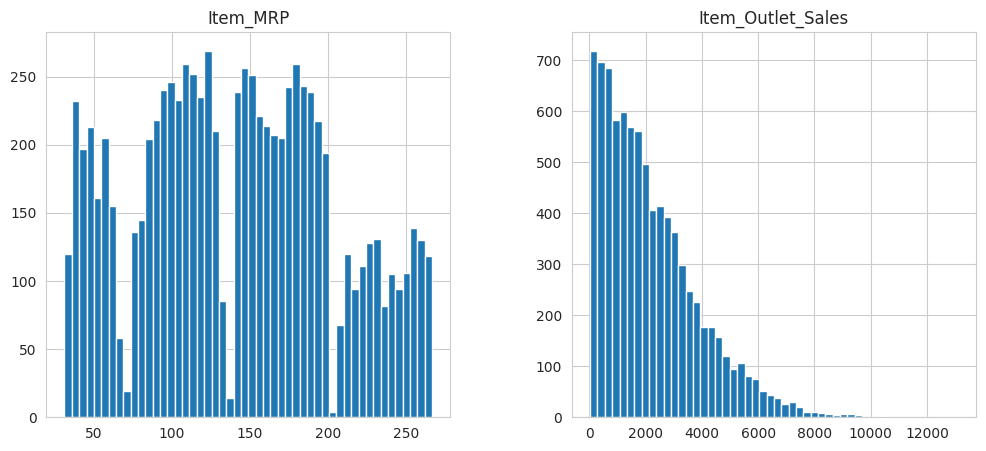

In [49]:
# Visualizing the distribution of 'Item_MRP' and 'Item_Outlet_Sales'
df1[['Item_MRP', 'Item_Outlet_Sales']].hist(bins=50, figsize=(12, 5))
plt.show()

# Why: To check for skewness, understand the distribution, and identify outliers in these key columns.

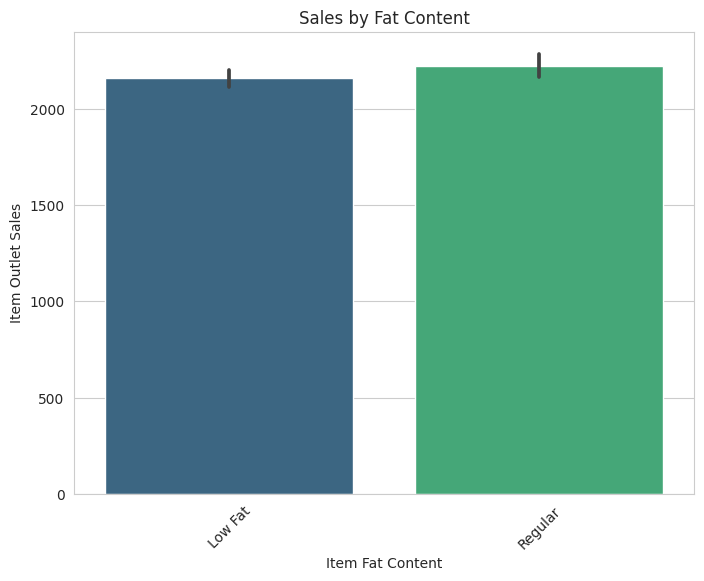

In [50]:
#Sales by Fat Content
plt.figure(figsize=(8, 6))
sns.barplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df1, palette='viridis')
plt.title('Sales by Fat Content')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item Fat Content')
plt.xticks(rotation=45)
plt.show()

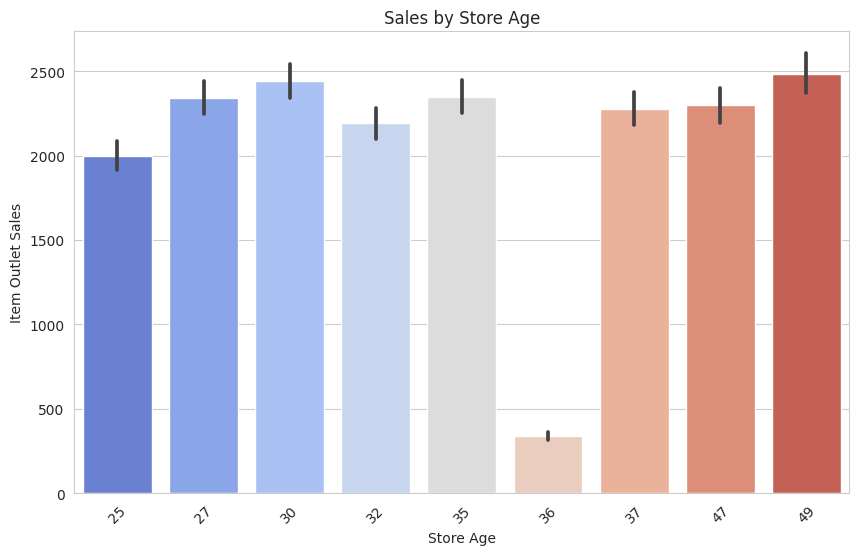

In [51]:
df1['Store_Age'] = 2034 - df1['Outlet_Establishment_Year']
df2['Store_Age'] = 2034 - df2['Outlet_Establishment_Year']

# 3. Sales by Store Age
plt.figure(figsize=(10, 6))
sns.barplot(x='Store_Age', y='Item_Outlet_Sales', data=df1, palette='coolwarm')
plt.title('Sales by Store Age')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Store Age')
plt.xticks(rotation=45)
plt.show()

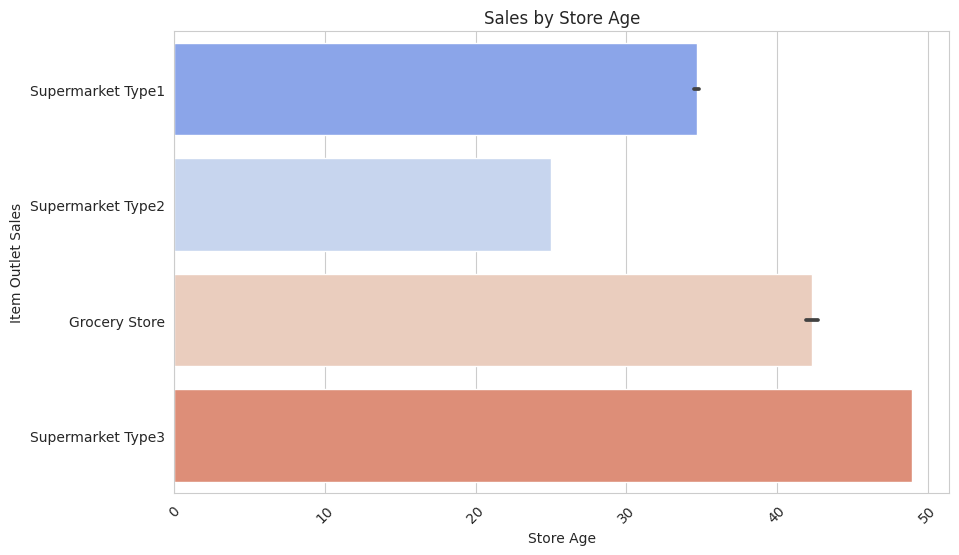

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Store_Age', y='Outlet_Type', data=df1, palette='coolwarm')
plt.title('Sales by Store Age')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Store Age')
plt.xticks(rotation=45)
plt.show()

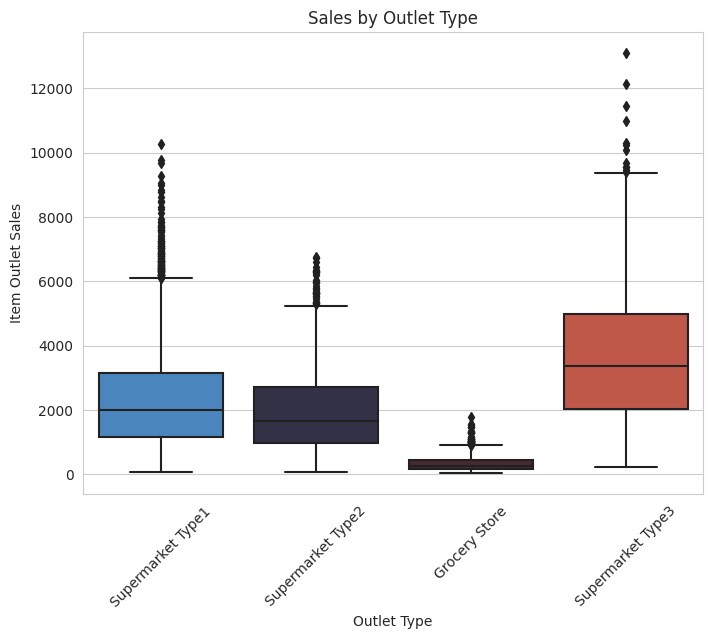

In [53]:
# 5. Sales by Outlet Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df1, palette='icefire')
plt.title('Sales by Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Outlet Type')
plt.xticks(rotation=45)
plt.show()


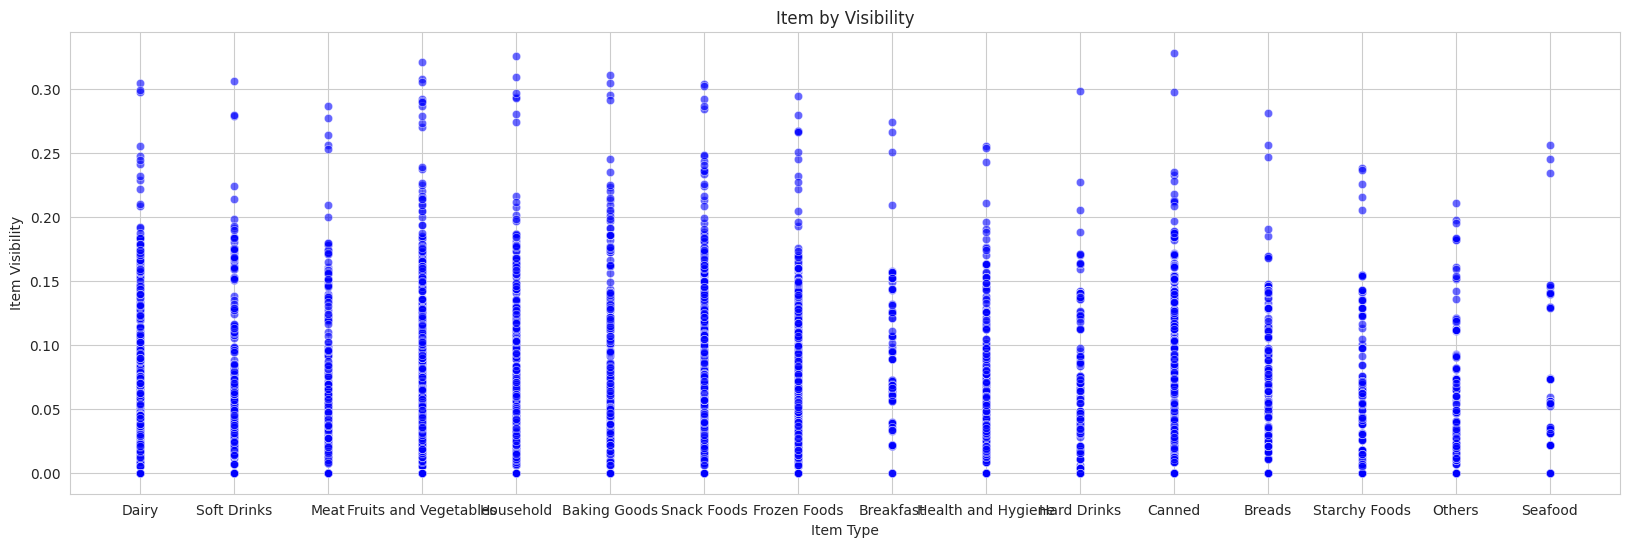

In [54]:
# 2. Sales by Visibility
plt.figure(figsize=(20, 6))
sns.scatterplot(x='Item_Type', y='Item_Visibility', data=df1, color='blue', alpha=0.6)
plt.title('Item by Visibility')
plt.ylabel('Item Visibility')
plt.xlabel('Item Type')
plt.show()

<Figure size 1000x600 with 0 Axes>

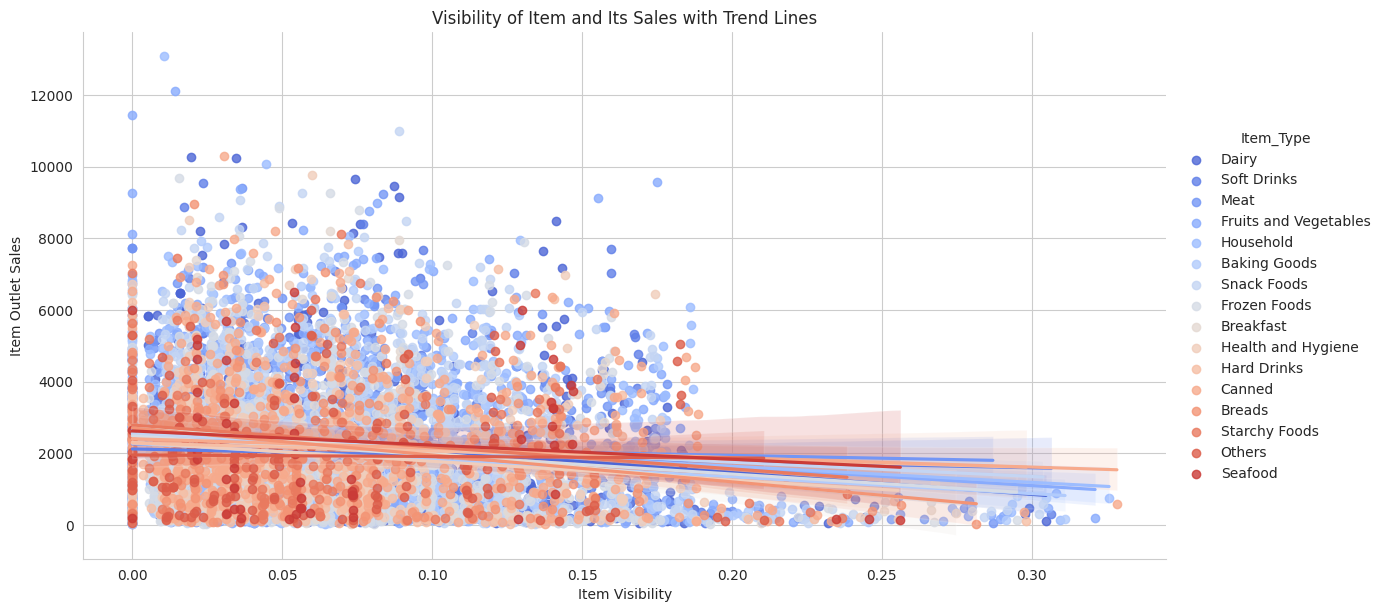

In [55]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Item_Visibility', y='Item_Outlet_Sales', hue='Item_Type', data=df1, palette='coolwarm', aspect=2, height=6)
plt.title('Visibility of Item and Its Sales with Trend Lines')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item Visibility')
plt.show()




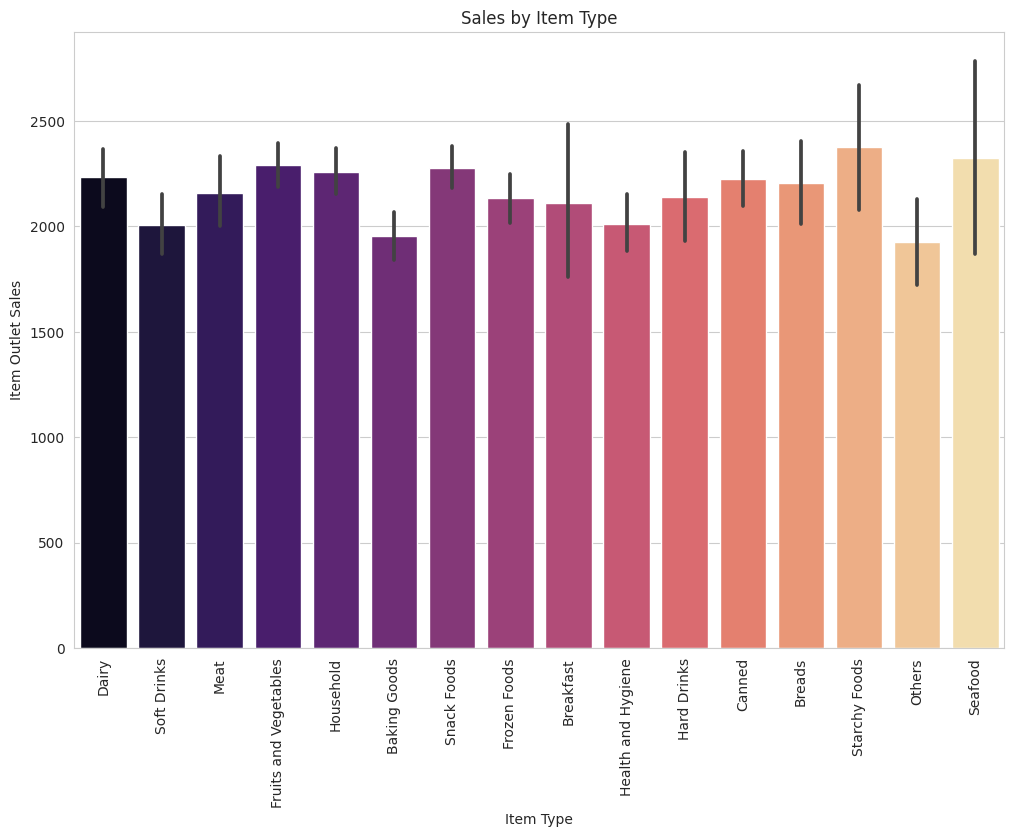

In [56]:
# 4. Sales by Item Type
plt.figure(figsize=(12, 8))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=df1, palette='magma')
plt.title('Sales by Item Type')
plt.ylabel('Item Outlet Sales')
plt.xlabel('Item Type')
plt.xticks(rotation=90)
plt.show()

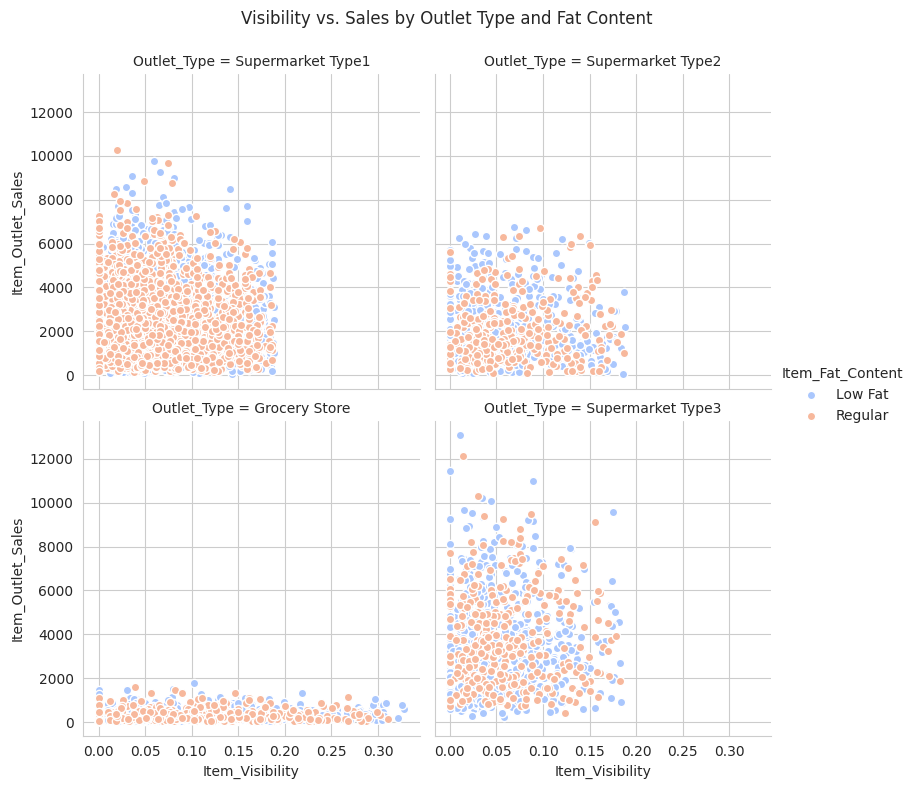

In [57]:
g = sns.FacetGrid(df1, col='Outlet_Type', hue='Item_Fat_Content', col_wrap=2, height=4, palette='coolwarm')
g = g.map(plt.scatter, 'Item_Visibility', 'Item_Outlet_Sales', edgecolor="w").add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Visibility vs. Sales by Outlet Type and Fat Content')
plt.show()


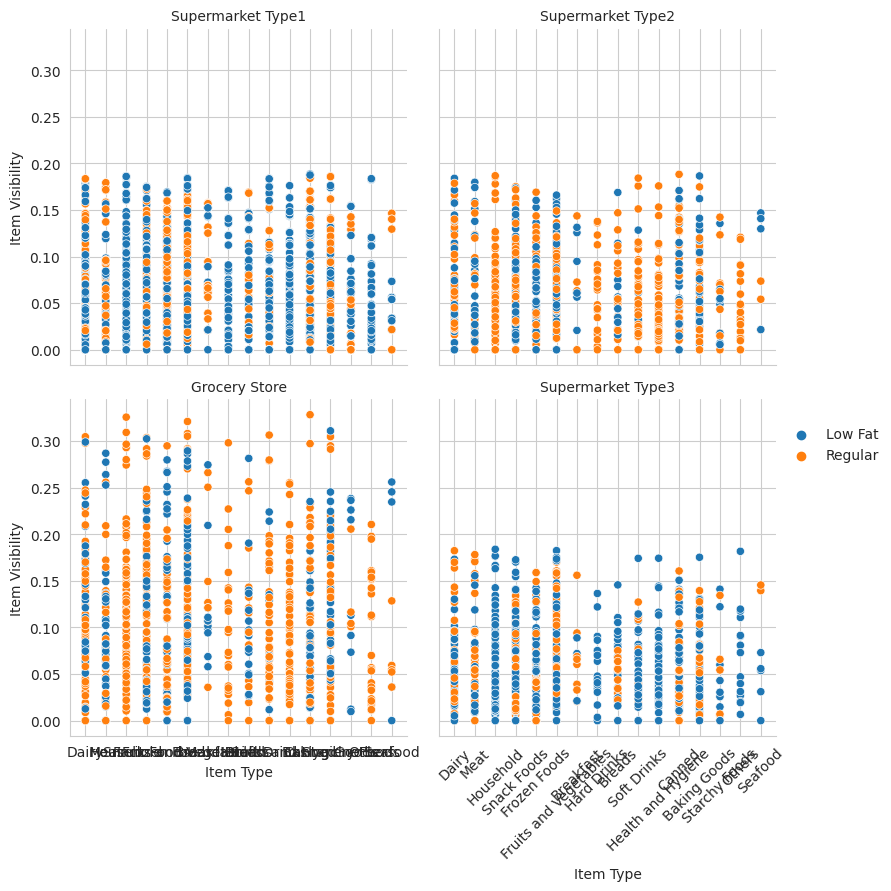

In [58]:
g = sns.FacetGrid(df1, col="Outlet_Type", col_wrap=2, height=4, margin_titles=True)
g.map_dataframe(sns.scatterplot, x="Item_Type", y="Item_Visibility", hue="Item_Fat_Content")
g.set_axis_labels("Item Type", "Item Visibility")
g.set_titles(col_template="{col_name}")
g.add_legend()
plt.xticks(rotation=45)
plt.show()


In [59]:
# Highest selling item type for each store type
highest_sales_per_store = df1.loc[df1.groupby('Outlet_Type')['Item_Outlet_Sales'].idxmax()]

# Lowest selling item type for each store type
lowest_sales_per_store = df1.loc[df1.groupby('Outlet_Type')['Item_Outlet_Sales'].idxmin()]

# Highest visibility item type for each store type
highest_visibility_per_store = df1.loc[df1.groupby('Outlet_Type')['Item_Visibility'].idxmax()]

# Lowest visibility item type for each store type
lowest_visibility_per_store = df1.loc[df1.groupby('Outlet_Type')['Item_Visibility'].idxmin()]

# Displaying the results
print("Highest Selling Item Type for Each Store Type:")
print(highest_sales_per_store[['Outlet_Type', 'Item_Type', 'Item_Outlet_Sales']], '\n')

print("Lowest Selling Item Type for Each Store Type:")
print(lowest_sales_per_store[['Outlet_Type', 'Item_Type', 'Item_Outlet_Sales']], '\n')

print("Highest Visibility Item Type for Each Store Type:")
print(highest_visibility_per_store[['Outlet_Type', 'Item_Type', 'Item_Visibility']], '\n')

print("Lowest Visibility Item Type for Each Store Type:")
print(lowest_visibility_per_store[['Outlet_Type', 'Item_Type', 'Item_Visibility']])


Highest Selling Item Type for Each Store Type:
            Outlet_Type  Item_Type  Item_Outlet_Sales
7759      Grocery Store  Household          1775.6886
4888  Supermarket Type1      Dairy         10256.6490
43    Supermarket Type2     Canned          6768.5228
7188  Supermarket Type3  Household         13086.9648 

Lowest Selling Item Type for Each Store Type:
            Outlet_Type           Item_Type  Item_Outlet_Sales
906       Grocery Store         Soft Drinks            33.2900
2370  Supermarket Type1           Household            73.2380
5573  Supermarket Type2           Household            69.2432
239   Supermarket Type3  Health and Hygiene           241.6854 

Highest Visibility Item Type for Each Store Type:
            Outlet_Type  Item_Type  Item_Visibility
854       Grocery Store     Canned         0.328391
6175  Supermarket Type1     Canned         0.188620
632   Supermarket Type2     Canned         0.188323
7943  Supermarket Type3  Household         0.183948 

Lowest

In [60]:
# Descriptive Statistics for Item_Outlet_Sales
sales_desc = df1['Item_Outlet_Sales'].describe()
print(sales_desc)

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64


In [61]:
# Select only numerical columns for correlation analysis
numerical_df = df1.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix['Item_Outlet_Sales'])

Item_Weight                  0.012088
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Store_Age                    0.049135
Name: Item_Outlet_Sales, dtype: float64


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

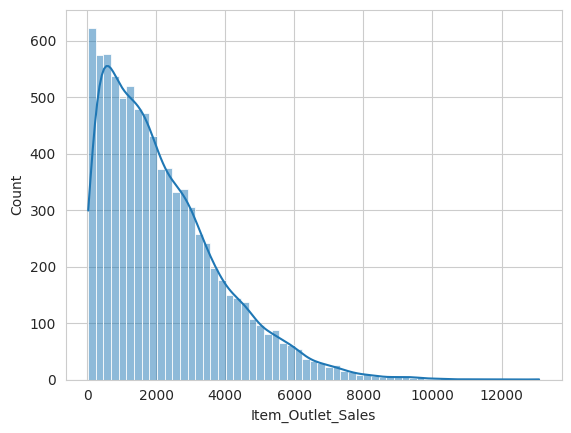

In [62]:
# Distribution Analysis of Item_Outlet_Sales
sns.histplot(df1['Item_Outlet_Sales'], kde=True)

# Interpretation:
# - A symmetric distribution suggests balanced sales.
# - Skewness indicates bias towards lower or higher sales.
# - KDE curve helps understand the shape of distribution.

<Axes: xlabel='Item_Outlet_Sales'>

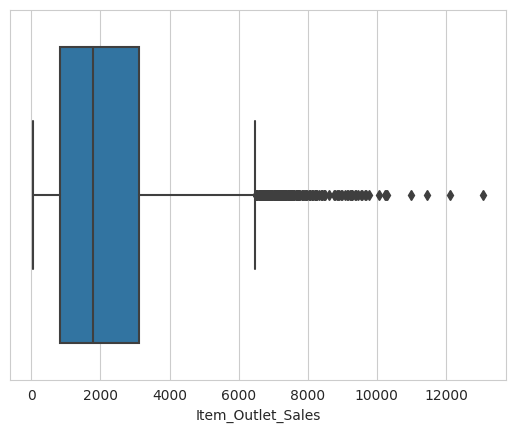

In [63]:
sns.boxplot(x=df1['Item_Outlet_Sales'])

# Interpretation:
# - Points beyond the whiskers in the boxplot indicate outliers.
# - Identifying outliers is crucial for understanding sales extremes and data quality.


In [64]:
# Grouped Analysis by Outlet_Type
grouped_sales_outlet_type = df1.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()
print(grouped_sales_outlet_type)

# Interpretation:
# This analysis provides average sales figures for each type of outlet, helping identify which outlet type performs best.

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64


In [65]:
# Assuming you have two types of outlets: 'Grocery Store' and 'Supermarket Type1'
group1 = df1[df1['Outlet_Type'] == 'Grocery Store']['Item_Outlet_Sales']
group2 = df1[df1['Outlet_Type'] == 'Supermarket Type1']['Item_Outlet_Sales']

# Perform T-Test
t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f"T-Statistic: {t_stat}, P-value: {p_val}")

# Interpretation:
# - A low p-value (typically < 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
# - A high p-value (> 0.05) suggests weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

T-Statistic: -90.69030728312184, P-value: 0.0


In [66]:
# Dynamically generating groups for ANOVA
outlet_types = df1['Outlet_Type'].unique()  # Extracts all unique outlet types from your DataFrame
groups = [df1[df1['Outlet_Type'] == outlet]['Item_Outlet_Sales'] for outlet in outlet_types]

# Perform ANOVA
f_stat, p_val = f_oneway(*groups)
print(f"F-Statistic: {f_stat}, P-value: {p_val}")

# Interpretation:
# - An F-Statistic value indicates the ratio of variance between the groups to the variance within the groups.
# - A low p-value (<0.05) suggests that there are significant differences in the average sales across different outlet types,
#   meaning at least one outlet type's average sales differ significantly from the others.

F-Statistic: 894.6500119018012, P-value: 0.0


In [67]:
# Creating a contingency table of the frequencies of Outlet_Location_Type and Outlet_Size
contingency_table = pd.crosstab(df1['Outlet_Location_Type'], df1['Outlet_Size'])

# Performing the Chi-Square Test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Squared Value: {chi2}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p_value < 0.05:
    print("There is a significant association between Outlet Location Type and Outlet Size.")
else:
    print("There is no significant association between Outlet Location Type and Outlet Size.")


''' Explanation:
Chi-Squared Value: This is the test statistic. A higher value indicates a greater discrepancy between observed and expected frequencies under the null hypothesis of independence.
P-Value: This indicates the probability of observing the data if the null hypothesis is true. A low p-value (typically < 0.05) suggests rejecting the null hypothesis, implying a significant association between the variables.
Degrees of Freedom: This is calculated based on the number of levels in each categorical variable. It's used in determining the critical value from the chi-square distribution.
Expected Frequencies: These are the frequencies expected in each category combination if there were no association between the variables.'''

Chi-Squared Value: 4806.778592709207
P-Value: 0.0
Degrees of Freedom: 4
Expected Frequencies:
[[ 261.13058782  782.55121436 1344.31819782]
 [ 304.54300129  912.64871524 1567.80828347]
 [ 366.32641089 1097.8000704  1885.87351871]]
There is a significant association between Outlet Location Type and Outlet Size.


" Explanation:\nChi-Squared Value: This is the test statistic. A higher value indicates a greater discrepancy between observed and expected frequencies under the null hypothesis of independence.\nP-Value: This indicates the probability of observing the data if the null hypothesis is true. A low p-value (typically < 0.05) suggests rejecting the null hypothesis, implying a significant association between the variables.\nDegrees of Freedom: This is calculated based on the number of levels in each categorical variable. It's used in determining the critical value from the chi-square distribution.\nExpected Frequencies: These are the frequencies expected in each category combination if there were no association between the variables."

In [68]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Fit on the training data and transform both training and test data
df1['Outlet_Type_Encoded'] = label_encoder.fit_transform(df1['Outlet_Type'])
df2['Outlet_Type_Encoded'] = label_encoder.transform(df2['Outlet_Type'])

In [69]:
# Calculate the mean visibility per item
visibility_avg = df1[df1['Item_Visibility'] > 0].groupby('Item_Identifier')['Item_Visibility'].mean()

# Function to adjust item visibility
def adjust_visibility(row):
    if row['Item_Visibility'] == 0:
        return visibility_avg[row['Item_Identifier']]
    return row['Item_Visibility']

# Apply function to both training and test sets
df1['Adjusted_Item_Visibility'] = df1.apply(adjust_visibility, axis=1)
df2['Adjusted_Item_Visibility'] = df2.apply(adjust_visibility, axis=1)

In [70]:
# Print unique values in Item_Visibility
unique_item_visibility = df1['Item_Visibility'].unique()
print("Unique Item Visibility values:")
print(unique_item_visibility)

# Print unique values in Item_MRP
unique_item_mrp = df1['Item_MRP'].unique()
print("\nUnique Item MRP values:")
print(unique_item_mrp)

Unique Item Visibility values:
[0.0160473  0.01927822 0.01676007 ... 0.03518627 0.14522065 0.04487828]

Unique Item MRP values:
[249.8092  48.2692 141.618  ...  57.5904 214.5218  75.467 ]


In [71]:
# Binning for Item_Visibility
visibility_bins = [0, 0.05, 0.1, 0.15, np.inf]
visibility_labels = ['Low', 'Medium', 'High', 'Very High']
df1['Item_Visibility_Bin'] = pd.cut(df1['Item_Visibility'], bins=visibility_bins, labels=visibility_labels, right=False)
df2['Item_Visibility_Bin'] = pd.cut(df2['Item_Visibility'], bins=visibility_bins, labels=visibility_labels, right=False)

# Binning for Item_MRP
mrp_bins = df1['Item_MRP'].quantile([0, 0.25, 0.5, 0.75, 1]).values
mrp_labels = ['Low', 'Medium', 'High', 'Very High']
df1['Item_MRP_Bin'] = pd.cut(df1['Item_MRP'], bins=mrp_bins, labels=mrp_labels)
df2['Item_MRP_Bin'] = pd.cut(df2['Item_MRP'], bins=mrp_bins, labels=mrp_labels)

# Displaying the head of the adjusted DataFrames to verify changes
print("Training Set Adjustments:")
print(df1[['Item_Visibility', 'Item_Visibility_Bin', 'Item_MRP', 'Item_MRP_Bin']].head())

print("\nTest Set Adjustments:")
print(df2[['Item_Visibility', 'Item_Visibility_Bin', 'Item_MRP', 'Item_MRP_Bin']].head())

Training Set Adjustments:
   Item_Visibility Item_Visibility_Bin  Item_MRP Item_MRP_Bin
0         0.016047                 Low  249.8092    Very High
1         0.019278                 Low   48.2692          Low
2         0.016760                 Low  141.6180       Medium
3         0.000000                 Low  182.0950         High
4         0.000000                 Low   53.8614          Low

Test Set Adjustments:
   Item_Visibility Item_Visibility_Bin  Item_MRP Item_MRP_Bin
0         0.007565                 Low  107.8622       Medium
1         0.038428                 Low   87.3198          Low
2         0.099575              Medium  241.7538    Very High
3         0.015388                 Low  155.0340         High
4         0.118599                High  234.2300    Very High


In [72]:
# Initialize label encoder
label_encoder = LabelEncoder()

# List of categorical columns to encode
categorical_cols = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Encode categorical columns
for col in categorical_cols:
    df1[col] = label_encoder.fit_transform(df1[col])
    df2[col] = label_encoder.transform(df2[col])  # Ensure the same encoding on test data

# Separating the features and target variable
X_train = df1.drop(columns=['Item_Outlet_Sales','Item_Identifier','Item_Type','Outlet_Identifier', 'Item_Visibility_Bin','Item_MRP_Bin'])
y_train = df1['Item_Outlet_Sales']

# Assuming df2 does not include the target variable
X_test = df2.drop(columns=['Item_Identifier','Item_Type','Outlet_Identifier', 'Item_Visibility_Bin','Item_MRP_Bin'])

In [73]:
print(df1.dtypes)

Item_Identifier                object
Item_Weight                   float64
Item_Fat_Content                int64
Item_Visibility               float64
Item_Type                      object
Item_MRP                      float64
Outlet_Identifier              object
Outlet_Establishment_Year       int64
Outlet_Size                     int64
Outlet_Location_Type            int64
Outlet_Type                     int64
Item_Outlet_Sales             float64
Store_Age                       int64
Outlet_Type_Encoded             int64
Adjusted_Item_Visibility      float64
Item_Visibility_Bin          category
Item_MRP_Bin                 category
dtype: object


In [74]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(objective='reg:squarederror'),
    'LightGBM': LGBMRegressor()
}

# Function to evaluate models
def evaluate_models(models, X_train, y_train):
    for name, model in models.items():
        model.fit(X_train, y_train)
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)
        print(f"{name} Average RMSE: {np.mean(rmse_scores)}")

# Evaluate models
evaluate_models(models, X_train, y_train)

Linear Regression Average RMSE: 1206.3336316321024
Random Forest Average RMSE: 1144.1240951364807
XGBoost Average RMSE: 1191.6431464686696
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 11
[LightGBM] [Info] Start training from score 2181.288915
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 2172.545146
[LightGBM] [Info] Auto-choosing row-wise mult

In [75]:
"""
This script encapsulates the comprehensive workflow of developing a predictive model, focusing on sales prediction based on item and outlet features. Our approach starts with preliminary data processing, advances through model selection, hyperparameter tuning, and concludes with model evaluation. Each step is integral to the development of a robust predictive model.

Initial Data Processing:
Prior to model training, we meticulously prepared our dataset by encoding categorical variables, imputing missing values, and selecting relevant features. This preprocessing stage laid the foundation for developing a reliable predictive model by ensuring our data is in the right format and of high quality.

Starting with Hyperparameter Tuning:
Given the dataset's prepared state, we initiate this script with hyperparameter tuning, recognizing its pivotal role in enhancing model performance. By employing GridSearchCV, we explore a range of parameter combinations for our chosen model - LightGBM (Light Gradient Boosting Machine), a decision that stems from LightGBM's efficiency and effectiveness across diverse datasets. This systematic search allows us to identify the optimal model configuration, significantly influencing our model's predictive accuracy.

Training the Optimized Model:
Armed with the best set of hyperparameters, we proceed to train our LightGBM model on the entire training set. This step is crucial as it leverages the insights gained from tuning to build a model that is finely adjusted to our specific prediction task.

Model Evaluation and Application:
Finally, we employ the optimized model to predict sales on unseen data, aiming to gauge its practical utility. While this script primarily focuses on prediction, in a comprehensive analysis, one would compare these predictions against actual sales figures to evaluate the model's performance quantitatively. The ultimate goal is to harness these predictions to derive actionable insights that can inform business strategies.

In essence, this script is a testament to the methodical process of building a predictive model from data preprocessing to application. It underscores the importance of each step in the pipeline, especially hyperparameter tuning, in crafting a model that is not only theoretically sound but also practically valuable.
"""


# Define the parameter grid
param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
}

# Initialize the model
lgbm = LGBMRegressor(random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Initialize the model with the best parameters
lgbm_final = LGBMRegressor(**grid_search.best_params_)

# Fit the final model on the training data
lgbm_final.fit(X_train, y_train)

# Make predictions on the test data
predictions = lgbm_final.predict(X_test)

# Assuming 'Item_Outlet_Sales' is the target in df1 and df2 doesn't contain this column
# Create a DataFrame for the predictions for easy visualization
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Sales'])

# Reset index on df1 to align it with predictions for side-by-side comparison
df1_reset = df1.reset_index(drop=True)
predictions_df_reset = predictions_df.reset_index(drop=True)

# Combine actual sales from df1 with predicted sales for comparison
comparison_df = pd.concat([df1_reset, predictions_df_reset], axis=1)

# Optionally, display a few rows to check the comparison
print(comparison_df[['Item_Identifier', 'Item_Outlet_Sales', 'Predicted_Sales']].head())

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 11
[Li

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

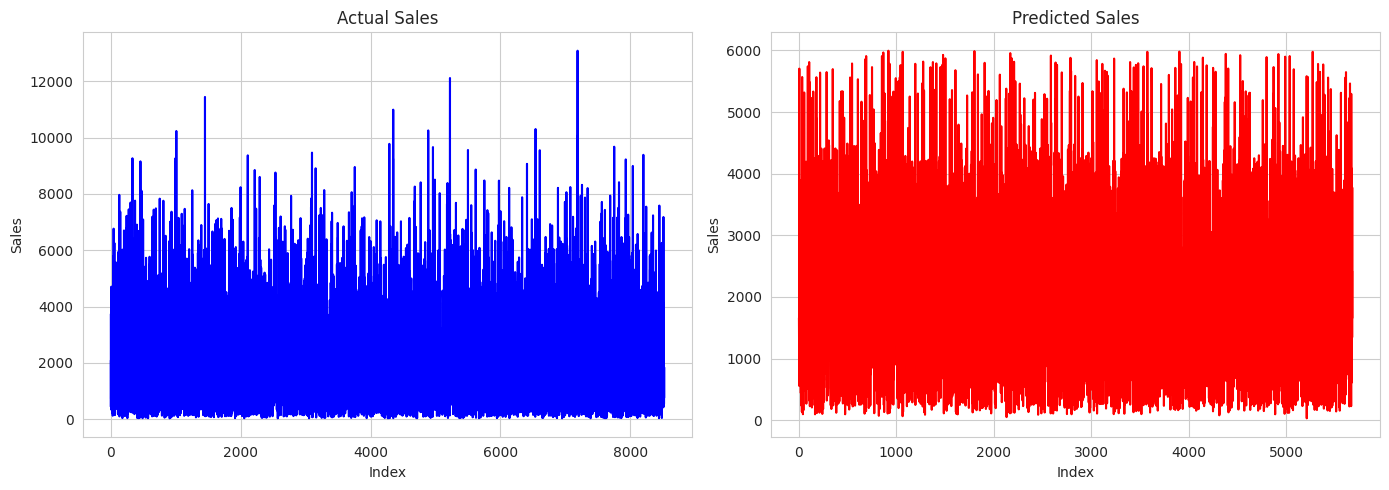

In [76]:
# Converting predictions to a DataFrame for easier handling
predictions_df = pd.DataFrame(predictions, columns=['Predicted_Sales'])

# Now, we're going to make two plots side by side for a clear visual comparison
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plotting actual sales from df1 on the first subplot
sns.lineplot(data=df1['Item_Outlet_Sales'].reset_index(drop=True), ax=axs[0], color='blue')
axs[0].set_title('Actual Sales')
axs[0].set_ylabel('Sales')
axs[0].set_xlabel('Index')

# Plotting predicted sales on the second subplot
sns.lineplot(data=predictions_df['Predicted_Sales'], ax=axs[1], color='red')
axs[1].set_title('Predicted Sales')
axs[1].set_ylabel('Sales')
axs[1].set_xlabel('Index')

plt.tight_layout()
plt.show()

# So here's what we've done: We created two subplots to visually compare the actual sales figures
# from our dataset with the sales figures our model predicted. The first plot shows the actual sales
# in blue, and the second plot shows our model's predictions in red.
# This side-by-side comparison helps us get a quick visual sense of how well our model's predictions
# align with the actual sales data. Though this won't give us exact figures or metrics like RMSE,
# it's a good starting point for visual analysis.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1036
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 2172.545146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1034
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 11
[LightGBM] [Info] Start training from score 2191.214108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Tota

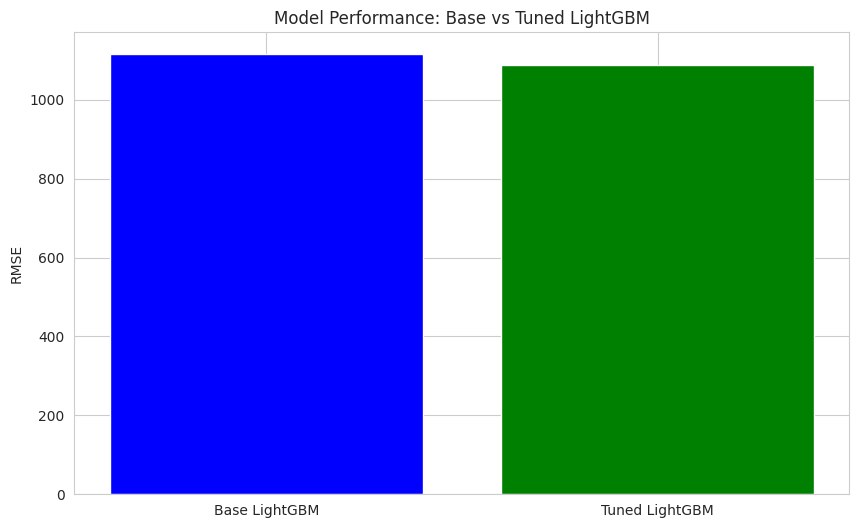

In [77]:
# Initialize the base LightGBM model
lgbm_base = LGBMRegressor()

# Perform cross-validation on the base model
cv_scores_base = cross_val_score(lgbm_base, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_base = np.sqrt(-cv_scores_base)

print(f"Base LightGBM Cross-validated RMSE: {np.mean(cv_rmse_scores_base)}")

# Now, for the tuned model:
cv_scores_tuned = cross_val_score(lgbm_final, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores_tuned = np.sqrt(-cv_scores_tuned)

print(f"Tuned LightGBM Cross-validated RMSE: {np.mean(cv_rmse_scores_tuned)}")

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(['Base LightGBM', 'Tuned LightGBM'], [np.mean(cv_rmse_scores_base), np.mean(cv_rmse_scores_tuned)], color=['blue', 'green'])
plt.ylabel('RMSE')
plt.title('Model Performance: Base vs Tuned LightGBM')
plt.show()

In [81]:
# Step 1: Random Search to explore a broad range of values
random_param_grid = {
    'num_leaves': np.random.randint(20, 150, 5),
    'reg_alpha': np.random.uniform(0, 1, 5),
    'min_data_in_leaf': np.random.randint(20, 500, 5),
    'lambda_l1': np.random.uniform(0, 2, 5),
    'lambda_l2': np.random.uniform(0, 2, 5)
}

# Initialize the model
lgbm_random = LGBMRegressor(random_state=42)

# Initialize Random Search model
random_search = RandomizedSearchCV(estimator=lgbm_random, param_distributions=random_param_grid,
                                   n_iter=100, cv=5, scoring='neg_mean_squared_error',
                                   n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters found by Random Search
print("Best parameters found by Random Search: ", random_search.best_params_)

# Step 2: Grid Search within a focused range based on Random Search results
focused_param_grid = {
    'num_leaves': [random_search.best_params_['num_leaves'] - 10, random_search.best_params_['num_leaves'], random_search.best_params_['num_leaves'] + 10],
    'reg_alpha': [max(0, random_search.best_params_['reg_alpha'] - 0.1), random_search.best_params_['reg_alpha'], random_search.best_params_['reg_alpha'] + 0.1],
    'min_data_in_leaf': [random_search.best_params_['min_data_in_leaf'] - 50, random_search.best_params_['min_data_in_leaf'], random_search.best_params_['min_data_in_leaf'] + 50],
    'lambda_l1': [max(0, random_search.best_params_['lambda_l1'] - 0.5), random_search.best_params_['lambda_l1'], random_search.best_params_['lambda_l1'] + 0.5],
    'lambda_l2': [max(0, random_search.best_params_['lambda_l2'] - 0.5), random_search.best_params_['lambda_l2'], random_search.best_params_['lambda_l2'] + 0.5]
}

# Initialize the model
lgbm_grid = LGBMRegressor(random_state=42)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=lgbm_grid, param_grid=focused_param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the model on training data refined by Random Search
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print("Best parameters found by Grid Search: ", grid_search.best_params_)

# Initialize the final model with the best parameters
lgbm_final = LGBMRegressor(**grid_search.best_params_)
lgbm_final.fit(X_train, y_train)

# Make predictions on the test data
predictions = lgbm_final.predict(X_test)

# Assuming 'Item_Outlet_Sales' is the target in df1 and df2 doesn't contain this column
# Here, 'predictions' are the sales predicted by the final model


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Warning] min_data_in_leaf is set=328, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=328
[LightGBM] [Warning] lambda_l2 is set=0.0489349943918449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0489349943918449
[LightGBM] [Warning] lambda_l1 is set=0.01774205460465117, reg_alpha=0.7068053211011764 will be ignored. Current value: lambda_l1=0.01774205460465117
[LightGBM] [Warning] min_data_in_leaf is set=328, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=328
[LightGBM] [Warning] lambda_l2 is set=0.0489349943918449, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0489349943918449
[LightGBM] [Warning] lambda_l1 is set=0.01774205460465117, reg_alpha=0.7068053211011764 will be ignored. Current value: lambda_l1=0.01774205460465117
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `forc

In [83]:
# Making predictions with the tuned model
final_predictions = lgbm_final.predict(X_test)


[LightGBM] [Warning] min_data_in_leaf is set=328, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=328
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] lambda_l1 is set=0.01774205460465117, reg_alpha=0.6068053211011765 will be ignored. Current value: lambda_l1=0.01774205460465117


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

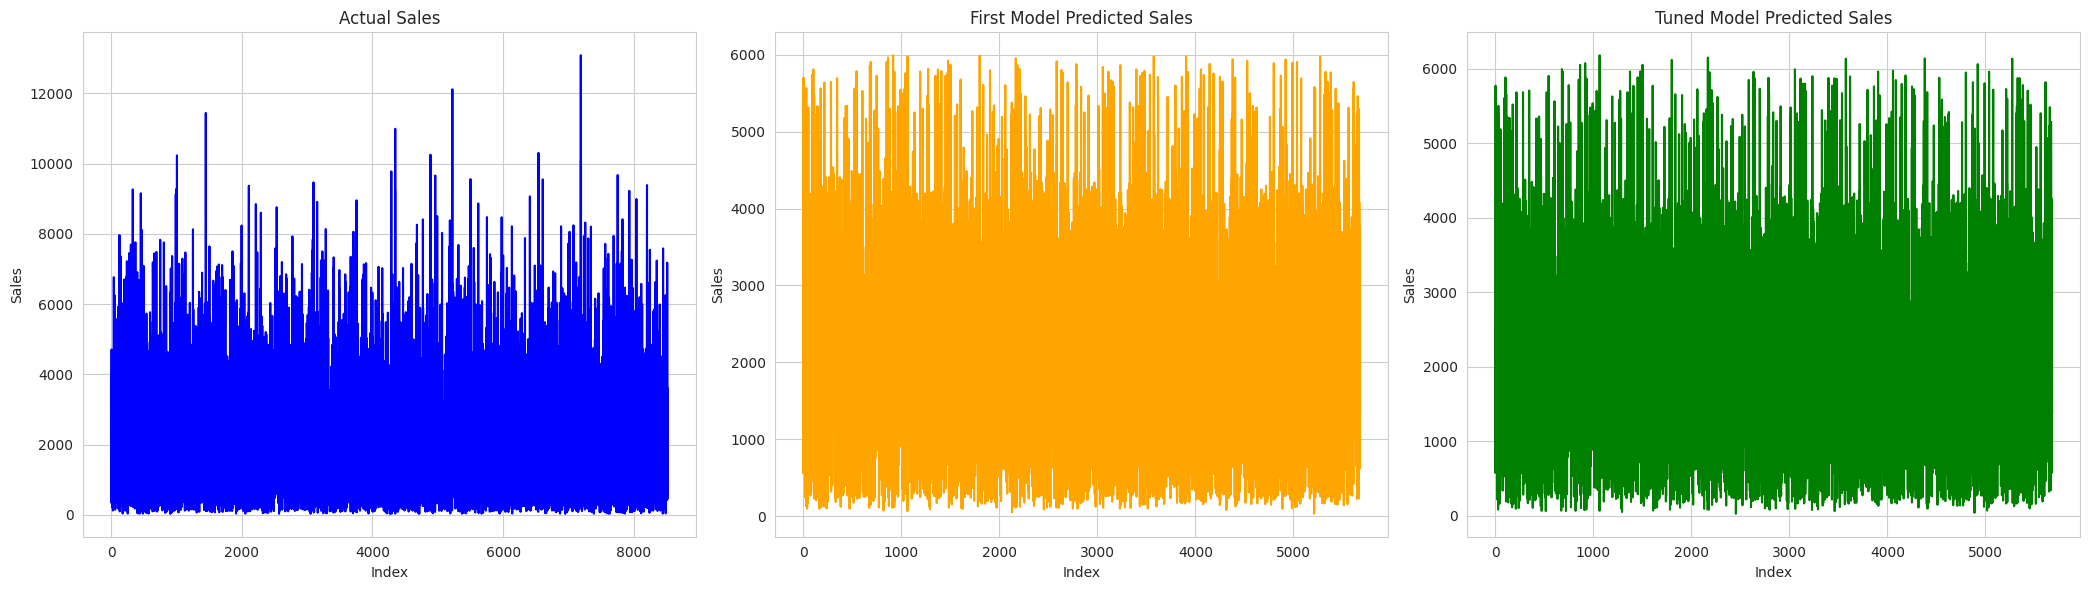

In [84]:

# Convert the new predictions to a DataFrame for easier handling
final_predictions_df = pd.DataFrame(final_predictions, columns=['Final_Predicted_Sales'])

# Make sure indices are aligned properly, especially if 'predictions' or 'final_predictions' arrays don't match the length of 'df1'
df1_reset = df1.reset_index(drop=True)
predictions_df_reset = predictions_df.reset_index(drop=True)
final_predictions_df_reset = final_predictions_df.reset_index(drop=True)[:len(df1)]

# Now, let's make three plots for a side-by-side comparison
fig, axs = plt.subplots(1, 3, figsize=(21, 6))

# Plotting actual sales from df1 on the first subplot
sns.lineplot(data=df1_reset['Item_Outlet_Sales'], ax=axs[0], color='blue')
axs[0].set_title('Actual Sales')
axs[0].set_ylabel('Sales')
axs[0].set_xlabel('Index')

# Plotting the first set of predicted sales on the second subplot
sns.lineplot(data=predictions_df_reset['Predicted_Sales'], ax=axs[1], color='orange')
axs[1].set_title('First Model Predicted Sales')
axs[1].set_ylabel('Sales')
axs[1].set_xlabel('Index')

# Plotting the final set of predicted sales (after hyperparameter tuning) on the third subplot
sns.lineplot(data=final_predictions_df_reset['Final_Predicted_Sales'], ax=axs[2], color='green')
axs[2].set_title('Tuned Model Predicted Sales')
axs[2].set_ylabel('Sales')
axs[2].set_xlabel('Index')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

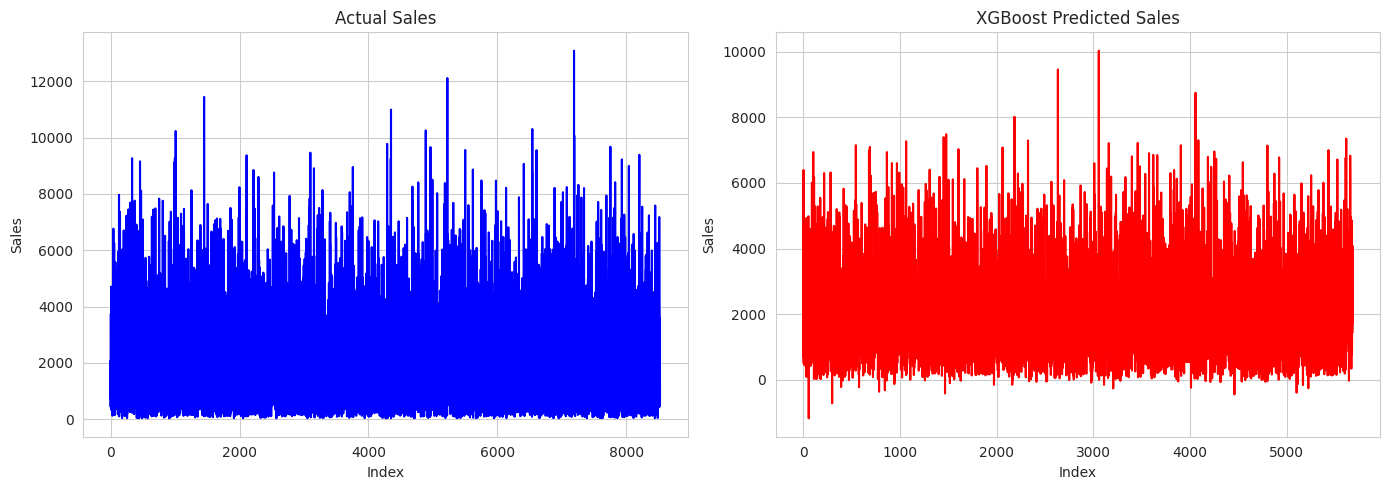

  Item_Identifier  Item_Outlet_Sales  XGB_Predicted_Sales
0           FDA15          3735.1380          1415.786865
1           DRC01           443.4228          1389.302002
2           FDN15          2097.2700           689.857971
3           FDX07           732.3800          2133.037109
4           NCD19           994.7052          6395.259766


In [85]:
# Initialize the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror')

# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_model.predict(X_test)

# Assuming 'Item_Outlet_Sales' is the target variable in df1 and df2 doesn't contain this column
# Create a DataFrame for the XGBoost predictions for easy visualization
xgb_predictions_df = pd.DataFrame(xgb_predictions, columns=['XGB_Predicted_Sales'])

# Reset index on df1 to align it with predictions for side-by-side comparison
df1_reset = df1.reset_index(drop=True)
xgb_predictions_df_reset = xgb_predictions_df.reset_index(drop=True)

# Combine actual sales from df1 with XGBoost predicted sales for comparison
comparison_df_xgb = pd.concat([df1_reset, xgb_predictions_df_reset], axis=1)

# Visualization
plt.figure(figsize=(14, 5))

# Plotting actual sales
plt.subplot(1, 2, 1)
sns.lineplot(data=df1['Item_Outlet_Sales'].reset_index(drop=True), color='blue')
plt.title('Actual Sales')
plt.ylabel('Sales')
plt.xlabel('Index')

# Plotting XGBoost predicted sales
plt.subplot(1, 2, 2)
sns.lineplot(data=xgb_predictions_df['XGB_Predicted_Sales'], color='red')
plt.title('XGBoost Predicted Sales')
plt.ylabel('Sales')
plt.xlabel('Index')

plt.tight_layout()
plt.show()

# Optionally, you can display the DataFrame to see actual vs predicted sales
print(comparison_df_xgb[['Item_Identifier', 'Item_Outlet_Sales', 'XGB_Predicted_Sales']].head())

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


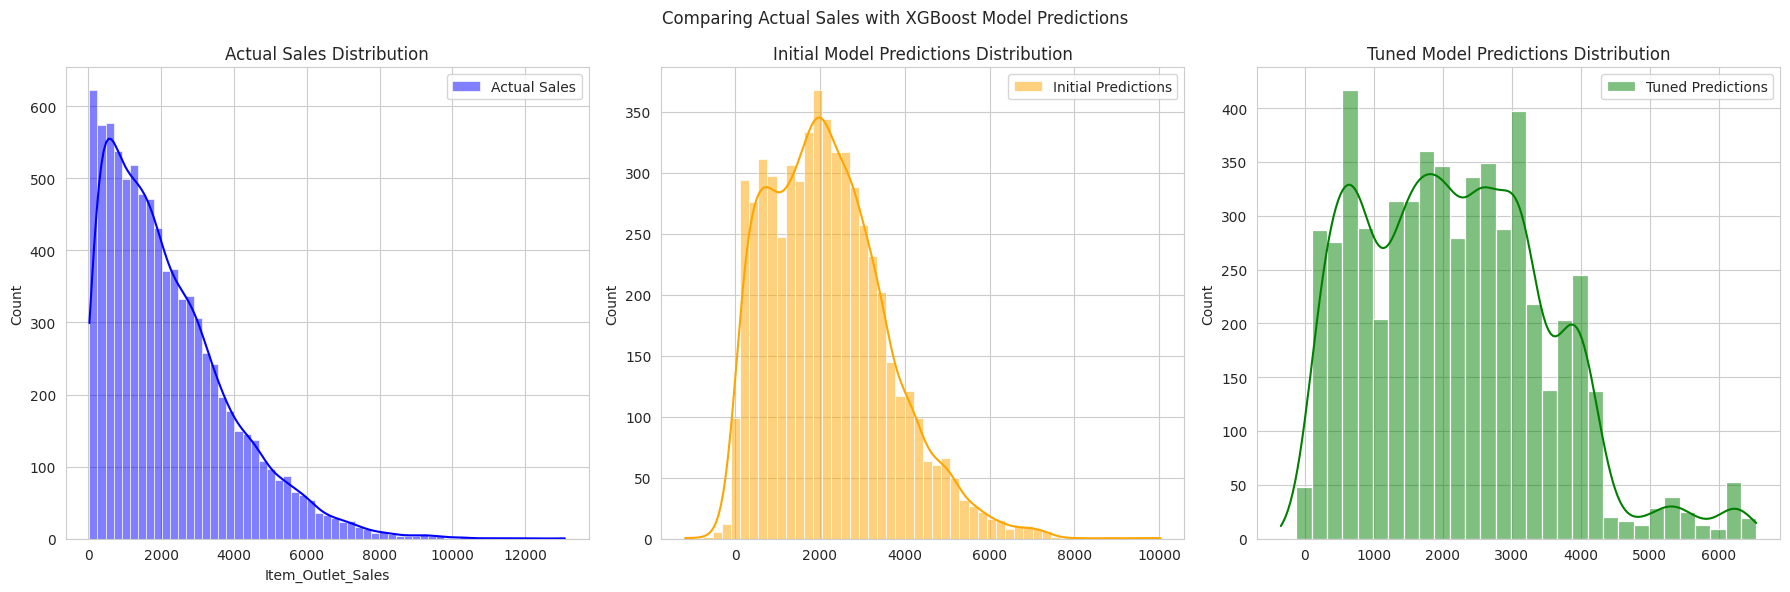

In [89]:
"""
This script focuses on refining an XGBoost model through hyperparameter tuning and comparing the
prediction results of the initial and tuned models against actual sales data. The key steps involved include:
- Hyperparameter tuning using GridSearchCV to find optimal model settings.
- Training the XGBoost model using both initial and tuned parameters.
- Visualizing the comparison of actual sales with the predictions from both models.

The aim is to improve the model's prediction accuracy and assess the impact of tuning on model performance.
"""


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror', random_state=42),
                           param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Step 2: Train and Predict with Initial and Tuned XGBoost Models
# Initial XGBoost model
xgb_initial = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_initial.fit(X_train, y_train)
initial_predictions = xgb_initial.predict(X_test)

# Tuned XGBoost model using best parameters from GridSearchCV
xgb_tuned = grid_search.best_estimator_
tuned_predictions = xgb_tuned.predict(X_test)

# Step 3: Visualization of Actual Sales vs. Model Predictions
# Assuming df1 contains the actual sales data
actual_sales = df1['Item_Outlet_Sales']

# Visualize the results
plt.figure(figsize=(18, 6))

# Plotting actual sales
plt.subplot(1, 3, 1)
sns.histplot(actual_sales, color='blue', kde=True, label='Actual Sales')
plt.title('Actual Sales Distribution')
plt.legend()

# Plotting initial model predictions
plt.subplot(1, 3, 2)
sns.histplot(initial_predictions, color='orange', kde=True, label='Initial Predictions')
plt.title('Initial Model Predictions Distribution')
plt.legend()

# Plotting tuned model predictions
plt.subplot(1, 3, 3)
sns.histplot(tuned_predictions, color='green', kde=True, label='Tuned Predictions')
plt.title('Tuned Model Predictions Distribution')
plt.legend()

plt.suptitle('Comparing Actual Sales with XGBoost Model Predictions')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

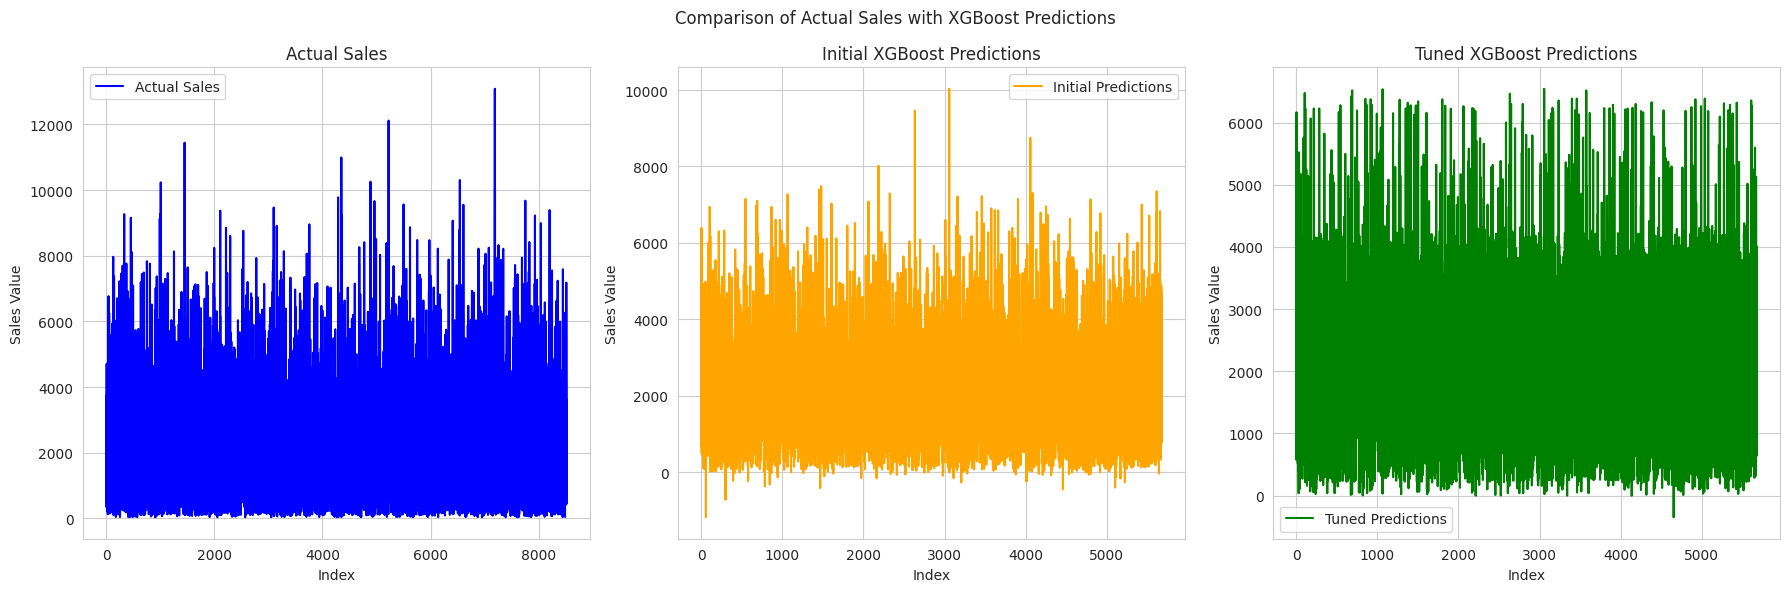

In [95]:
# Convert actual sales, initial model predictions, and tuned model predictions to pandas series for easy plotting
actual_sales_series = pd.Series(df1['Item_Outlet_Sales'].values, name="Actual Sales")
initial_predictions_series = pd.Series(initial_predictions, name="Initial Predictions")
tuned_predictions_series = pd.Series(tuned_predictions, name="Tuned Predictions")

# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot actual sales
plt.subplot(1, 3, 1)
sns.lineplot(data=actual_sales_series.reset_index(drop=True), color='blue', label='Actual Sales')
plt.title('Actual Sales')
plt.xlabel('Index')
plt.ylabel('Sales Value')

# Plot initial model predictions
plt.subplot(1, 3, 2)
sns.lineplot(data=initial_predictions_series.reset_index(drop=True), color='orange', label='Initial Predictions')
plt.title('Initial XGBoost Predictions')
plt.xlabel('Index')
plt.ylabel('Sales Value')

# Plot tuned model predictions
plt.subplot(1, 3, 3)
sns.lineplot(data=tuned_predictions_series.reset_index(drop=True), color='green', label='Tuned Predictions')
plt.title('Tuned XGBoost Predictions')
plt.xlabel('Index')
plt.ylabel('Sales Value')

plt.suptitle('Comparison of Actual Sales with XGBoost Predictions')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


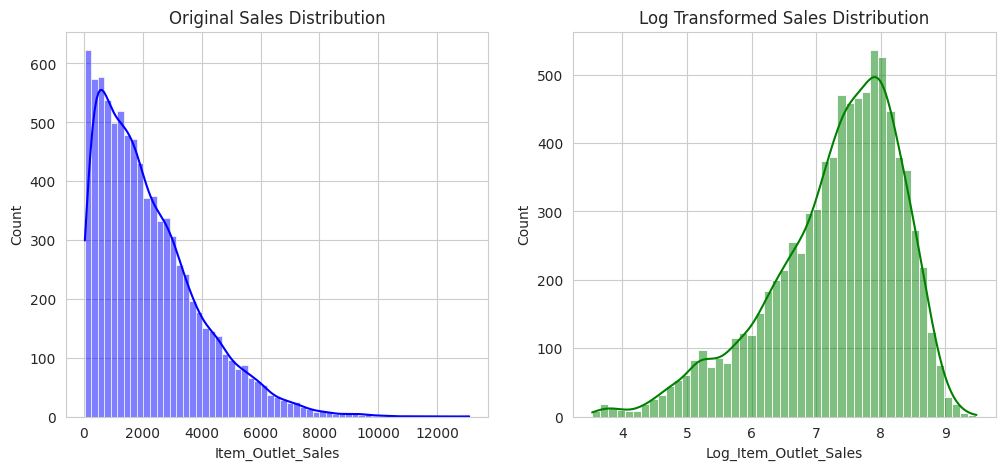

In [91]:
# Before transformation
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df1['Item_Outlet_Sales'], kde=True, color='blue')
plt.title('Original Sales Distribution')

# Log transformation
df1['Log_Item_Outlet_Sales'] = np.log1p(df1['Item_Outlet_Sales'])

# After transformation
plt.subplot(1, 2, 2)
sns.histplot(df1['Log_Item_Outlet_Sales'], kde=True, color='green')
plt.title('Log Transformed Sales Distribution')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

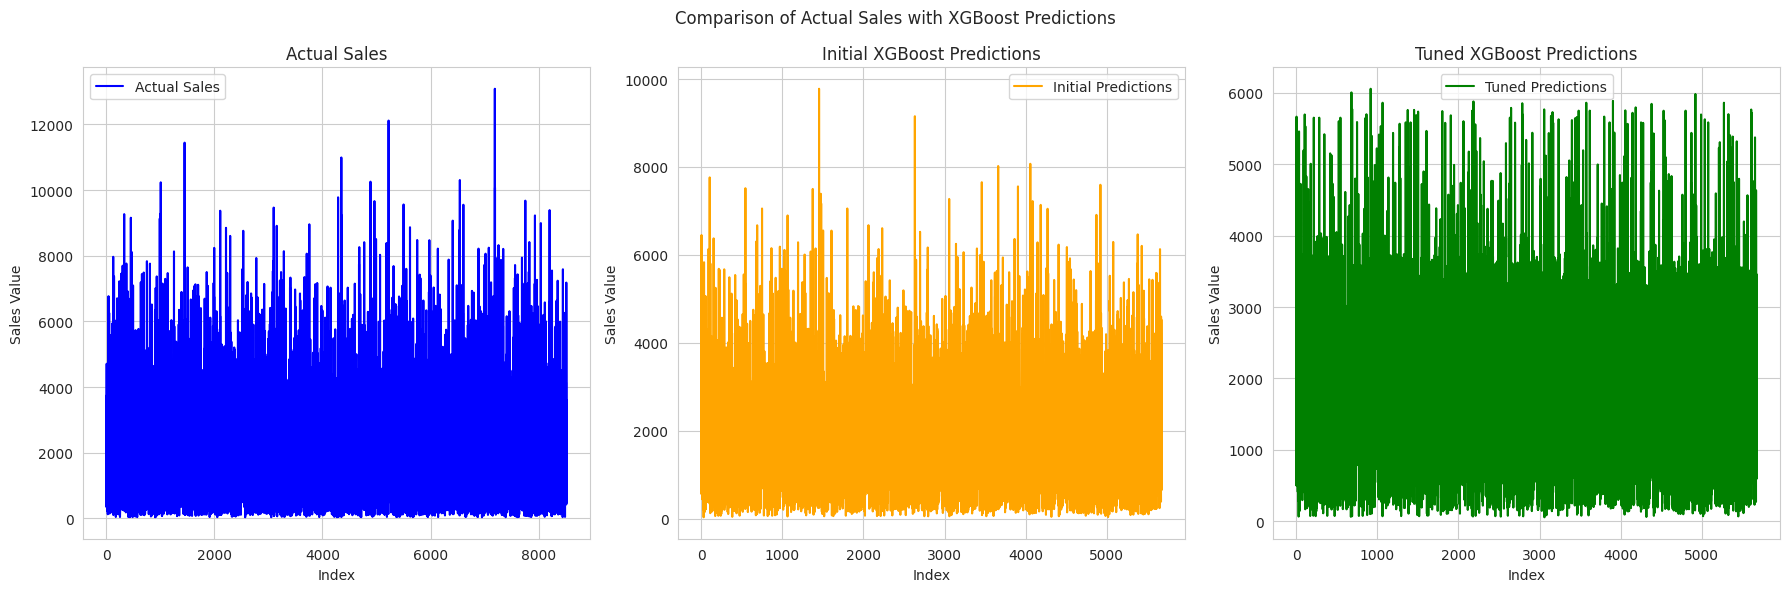

In [96]:
# Apply log transformation to y_train to deal with skewness
y_train_log = np.log1p(y_train)

# Initial XGBoost model
xgb_initial = XGBRegressor(objective='reg:squarederror')
xgb_initial.fit(X_train, y_train_log)

# Predict on X_test (predictions will be in log scale)
log_predictions_initial = xgb_initial.predict(X_test)
# Convert predictions back to original scale
predictions_initial = np.expm1(log_predictions_initial)

# Hyperparameter tuning for XGBoost
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}

grid_search = GridSearchCV(estimator=XGBRegressor(objective='reg:squarederror'),
                           param_grid=param_grid,
                           cv=3,
                           scoring='neg_mean_squared_error')

# Fit the model on the log-transformed y_train
grid_search.fit(X_train, y_train_log)

# Best estimator
xgb_tuned = grid_search.best_estimator_

# Predict with the tuned model (predictions will be in log scale)
log_predictions_tuned = xgb_tuned.predict(X_test)
# Convert predictions back to original scale
predictions_tuned = np.expm1(log_predictions_tuned)

# Convert y_train, predictions_initial, and predictions_tuned to Pandas Series for easy plotting
y_train_series = pd.Series(y_train).reset_index(drop=True)
predictions_initial_series = pd.Series(predictions_initial).reset_index(drop=True)
predictions_tuned_series = pd.Series(predictions_tuned).reset_index(drop=True)

# Visualization
plt.figure(figsize=(18, 6))

# Plot actual sales
plt.subplot(1, 3, 1)
sns.lineplot(data=y_train_series, color='blue', label='Actual Sales')
plt.title('Actual Sales')
plt.xlabel('Index')
plt.ylabel('Sales Value')

# Plot initial model predictions
plt.subplot(1, 3, 2)
sns.lineplot(data=predictions_initial_series, color='orange', label='Initial Predictions')
plt.title('Initial XGBoost Predictions')
plt.xlabel('Index')
plt.ylabel('Sales Value')

# Plot tuned model predictions
plt.subplot(1, 3, 3)
sns.lineplot(data=predictions_tuned_series, color='green', label='Tuned Predictions')
plt.title('Tuned XGBoost Predictions')
plt.xlabel('Index')
plt.ylabel('Sales Value')

plt.suptitle('Comparison of Actual Sales with XGBoost Predictions')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

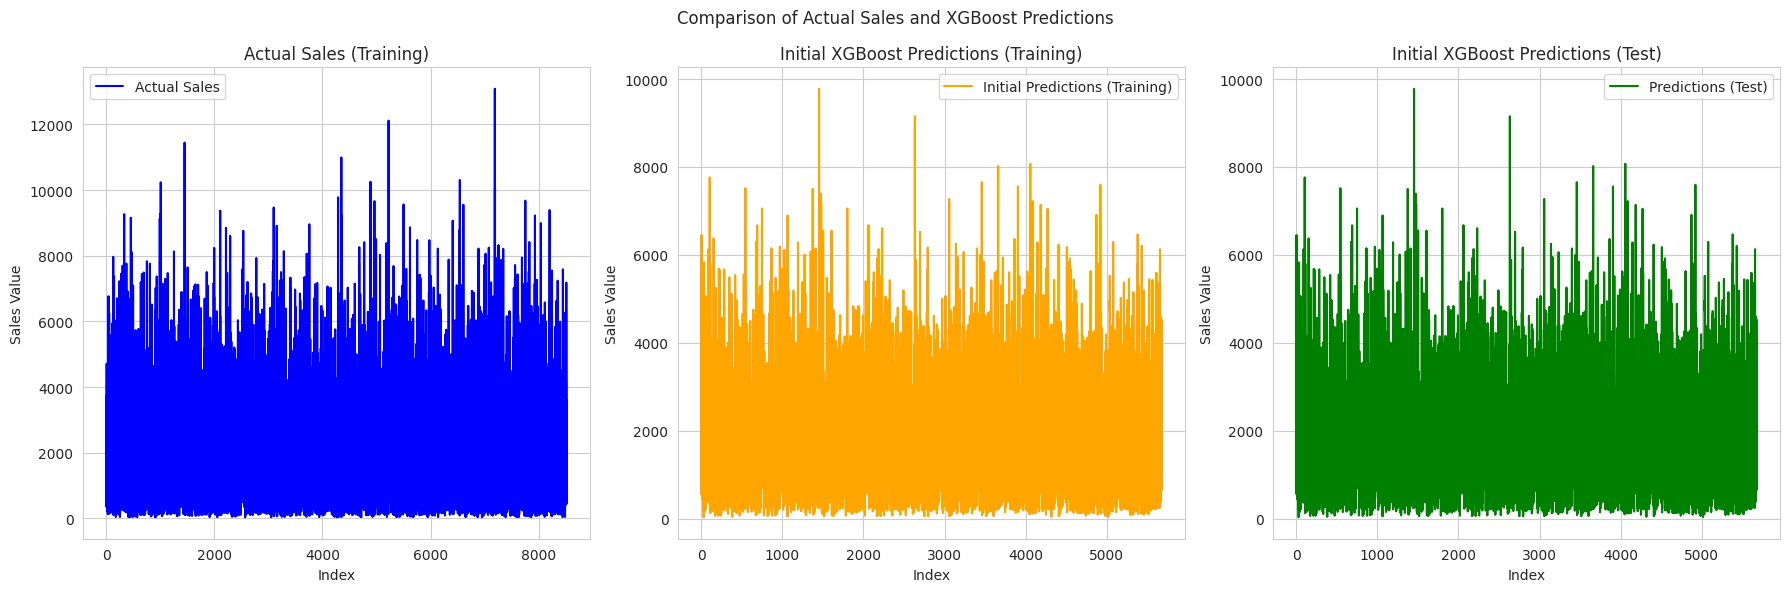

In [98]:
# Step 1: Make predictions on X_test with the initial model
log_predictions_test = xgb_initial.predict(X_test)
# Convert predictions from log scale back to original scale
predictions_test = np.expm1(log_predictions_test)

# Step 2: Visualization for comparison
# Convert y_train, predictions_initial (from training), and predictions_test to Pandas Series for easy plotting
y_train_series = pd.Series(y_train).reset_index(drop=True)
predictions_initial_series = pd.Series(predictions_initial).reset_index(drop=True)  # Assuming predictions_initial are available
predictions_test_series = pd.Series(predictions_test).reset_index(drop=True)

# Visualization
plt.figure(figsize=(18, 6))

# Plot actual sales from training set
plt.subplot(1, 3, 1)
sns.lineplot(data=y_train_series, color='blue', label='Actual Sales')
plt.title('Actual Sales (Training)')
plt.xlabel('Index')
plt.ylabel('Sales Value')

# Plot initial model predictions on training set
plt.subplot(1, 3, 2)
sns.lineplot(data=predictions_initial_series, color='orange', label='Initial Predictions (Training)')
plt.title('Initial XGBoost Predictions (Training)')
plt.xlabel('Index')
plt.ylabel('Sales Value')

# Plot initial model predictions on test set
plt.subplot(1, 3, 3)
sns.lineplot(data=predictions_test_series, color='green', label='Predictions (Test)')
plt.title('Initial XGBoost Predictions (Test)')
plt.xlabel('Index')
plt.ylabel('Sales Value')

plt.suptitle('Comparison of Actual Sales and XGBoost Predictions')
plt.tight_layout()
plt.show()

1. Feature: Item_MRP, Importance: 567
2. Feature: Item_Weight, Importance: 229
3. Feature: Adjusted_Item_Visibility, Importance: 179
4. Feature: Item_Visibility, Importance: 177
5. Feature: Outlet_Establishment_Year, Importance: 156
6. Feature: Outlet_Type, Importance: 114
7. Feature: Outlet_Location_Type, Importance: 55
8. Feature: Outlet_Size, Importance: 33
9. Feature: Item_Fat_Content, Importance: 13
10. Feature: Store_Age, Importance: 0
11. Feature: Outlet_Type_Encoded, Importance: 0


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


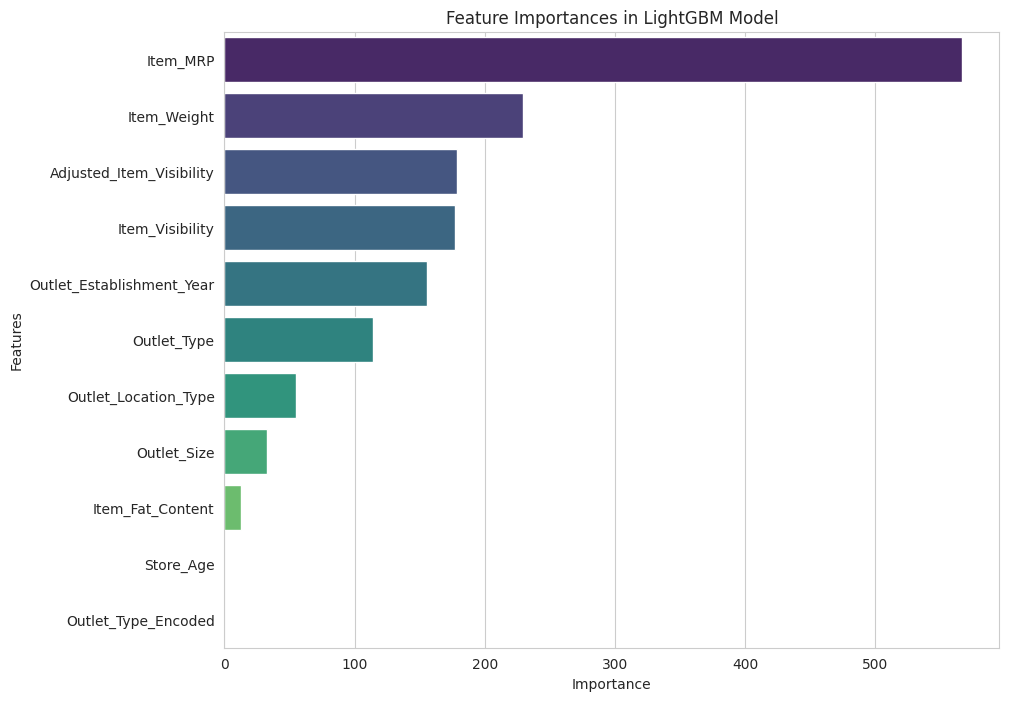

In [78]:
# After running a grid search to find the best parameters for our LightGBM model,
# we use the best_estimator_ attribute to get the best version of the model.
lgbm = grid_search.best_estimator_

# Get feature importances
''' Now, to understand how each feature in our dataset contributes to the model's predictions,
we use the feature_importances_ attribute of our model. This tells us the significance
of each feature in making predictions. '''
importances = lgbm.feature_importances_

# Pair feature names with their importance scores and sort them
sorted_importance = sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)

''' We then print out these importances, along with the feature names, to see which features
are the most influential in our model's predictions. This helps us focus our data
preprocessing and feature engineering efforts on the most impactful features. '''
for i, (col, importance) in enumerate(sorted_importance):
    print(f"{i+1}. Feature: {col}, Importance: {importance}")

# Visualizing the feature importances
''' Finally, visualizing these feature importances helps us quickly identify which features
have the most impact on our model's decision-making process. It's a crucial step for understanding
our model's behavior and guiding further data analysis and feature selection. '''
plt.figure(figsize=(10, 8))
sns.barplot(x=[x[1] for x in sorted_importance], y=[x[0] for x in sorted_importance], palette="viridis")
plt.title("Feature Importances in LightGBM Model")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()